MATH5453M Numerics Coursework 1
===============================

**Author** : *James Baxter Chapman* - **Student ID** : *201425083*


**Date** : *18th October 2024*

**Python Libraries required:**

- Numpy
- Scipy
- Matplotlib

___

Consider the non-dimensional linear advection-diﬀusion equation for the variable/unknown
$u = u(x,t)$, with an initial condition and boundary conditions:


$$ u_{t} - \alpha (t)u_{x} -  \epsilon u_{xx} = 0 \space \text{for} \space x ∈ [L_p,L] \tag{1-a} $$ 
 
$$ u(x, 0) = u_{0}(x) \tag{1-b} $$

$$ u(L_{p}, t) = u(L, t) = 0 \tag{1-c}$$

(small) constant diﬀusion $\epsilon$ and a given function $\alpha (t)$. The boundary conditions are classical
homogeneous Dirichlet conditions. The above system arose from the research on machine
learning of Choi et al. (2022).



# Question 1
**Why is $(1-a)$ a linear advection-diffusion equation? Explain all three terms used, i.e. "linear" (precicely), "advection" and "diffusion".**

___

A Differential Equation is Linear when the dependant variable and its derivatives appear linearly. In this case, the dependant variable $u$ and it's derivative is raised to the power of 1, instead of something that would incease nonlinearly such as $u^{2}$ or a different nonlinear function such as $\sin(u)$. There are also no terms involving the dependant variable $u$ that are multiplied by eachother, for example: $ u \cdot \frac{\partial u}{\partial x} $.

The term Advection refers to describe the transport of a substance or property. In the advection-diffusion equation (1-a), the advection term $\alpha(t) \frac{\partial u}{\partial x}$ refers to the change in $u$ with respect to the change in position, or movement, of $u$. Usually, advection is velocity dependant and not time dependant, however coupled with the $\alpha(t)$ function that varies the advection coefficient with time, this adds a time dependance dependant on the function $\alpha$ (which could also be constant).

The term Diffusion describes the movement of substance from regions of high concentration to low concentration. For example, in the heat equation, the diffusion of heat represents a dissipation of a high concentration of thermal energy to a region with lower concentration. The diffusion term in the advection-diffusion equation (1-a) is $\epsilon \frac{\partial^{2}u}{\partial x^{2}}$, and is supported by the diffusion coefficient $\epsilon$, which is constant.

# Question 2

**For the $\theta$-method, prove equations (2.80) to (2.84) in "Numerical Solution of Partial Differential Equations" by Morton & Mayers (M&M).**

___

The taylor [OB: Taylor] series formula is given by:
$$
f(x) \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n \tag{a}
$$
Using this, the points $u_j^{n+1}$ and $u_j^n$ can be evaluated from the middle of the 6 point stencil at $u_j^{n+1/2}$.
$$
u_{j}^{n+1} = u + \frac{\Delta t}{2} u_t + \frac{1}{2} \frac{\Delta t}{2}^2 u_{tt} + \frac{1}{3!} \frac{\Delta t}{2}^2 u_{ttt}+ \dots \tag{b}
$$
$$
u_{j}^{n} = u - \frac{\Delta t}{2} u_t + \frac{1}{2} \frac{\Delta t}{2}^2 u_{tt} - \frac{1}{3!} \frac{\Delta t}{2}^2 u_{ttt} + \dots \tag{c}
$$
The upwind finite difference approximation can be substituted here (3-a below), and $\Delta t$ multiplied on both sides.
$$
u_{j}^{n+1} - u_{j}^{n} = \Delta t u_t + \frac{1}{6} \frac{\Delta t}{2}^3 u_{ttt} + \dots \tag{d}
$$

Applying the central finite difference operator in time gives:
$$
\delta _t u_j^{n+1/2} = u_t + \frac{1}{24} \frac{\Delta t}{2}^3 u_{ttt} + \dots \tag{2.80}
$$

The 2nd order finite difference operator in space reads:
$$
\delta _{x}^{2} u_{j}^{n+1} = \frac{u_{j+1}^{n} - 2u_{j}^{n} + u_{j-1}^{n}}{\Delta x ^2} \tag{e}
$$
Applying a taylor expansion in space for  $u(x_{j+1}, t^n)$ around $x_j$ gives:
$$
u_{j+1}^n = u_j^n + \Delta x u_x + \frac{\Delta x ^2}{2!} u_{xx} + \frac{\Delta x ^3}{3!}u_{xxx} + \frac{\Delta x ^4}{4!}u_{xxxx} + \dots \tag{f}
$$
The same for $u(x_{j-1}, t^n)$ around $x_j$ gives:
$$
u_{j+1}^n = u_j^n - \Delta x u_x + \frac{\Delta x ^2}{2!} u_{xx} - \frac{\Delta x ^3}{3!}u_{xxx} + \frac{\Delta x ^4}{4!}u_{xxxx} + \dots \tag{g}
$$
Substituting these two approximations (f, g) into the 2nd order finite difference formula (e) and simplifying gives:
$$
\delta _x ^2 u_{j}^{n+1} = (\Delta x ^2)u_xx + \frac{\Delta x ^4}{12}u_{xxxx} + \dots \tag{2.81}
$$
Now, performing a taylor expansion in t about $(x_j, t^{n+1/2})$ gives:
$$
\delta _x ^2 u_{j}^{n+1} = (\Delta x ^2)u_xx + \frac{\Delta x ^4}{12}u_{xxxx} + \dots + \frac{\Delta t}{2}(\Delta x )^2 u_{xxt} + \frac{1}{2!}\frac{\Delta t}{2} (\Delta x )^2 u_{xxtt} + \dots \tag{h}
$$
$$
\delta _x ^2 u_{j}^{n} = (\Delta x ^2)u_xx + \frac{\Delta x ^4}{12}u_{xxxx} + \dots - \frac{\Delta t}{2}(\Delta x )^2 u_{xxt} + \frac{1}{2!}\frac{\Delta t}{2} (\Delta x )^2 u_{xxtt} + \dots \tag{i}
$$
Now the theta method can be applied to this in the form $\theta \delta _x ^2 u_{j}^{n+1} + (1-\theta)\delta _x ^2 u_{j}^{n}$
$$
\theta \delta _x ^2 u_{j}^{n+1} + (1-\theta)\delta _x ^2 u_{j}^{n} = (\Delta x ^2)u_xx + \frac{\Delta x ^4}{12}u_{xxxx} + \dots + (\theta - \frac{1}{2})\frac{\Delta t}{2}(\Delta x )^2 u_{xxt} + \frac{1}{2!}\frac{\Delta t}{2} (\Delta x )^2 u_{xxtt} + \dots \tag{2.82}
$$
The time central difference taylor series expansion from (2.80) is given as:
$$
\delta _t ^{n+1/2} = \frac{u_j^{n+1} - u_j^{n}}{\delta t} = u_t + \frac{\Delta t ^2}{24}u_{ttt} + \dots \tag{j}
$$
The truncation error can be defined as:
$$
T_{j}^{n+1/2} = \delta _t ^{n+1/2} - (\theta \delta _x ^2 u_{j}^{n+1} + (1-\theta)\delta _x ^2 u_{j}^{n}) \tag{2.83}
$$
Substituting (2.82) and (j) into (2.83) gives (2.84) as:
$$
T_j^{n+1/2} = u_t + \frac{\Delta t ^2}{24}u_{ttt} + \dots - ((\Delta x ^2)u_xx + \frac{\Delta x ^4}{12}u_{xxxx} + \dots + (\theta - \frac{1}{2})\frac{\Delta t}{2}(\Delta x )^2 u_{xxt} + \frac{1}{2!}\frac{\Delta t}{2} (\Delta x )^2 u_{xxtt} + \dots) \tag{2.84}
$$
Giving the truncation error for just the diffusion equation using the theta-method.

# Question 3

**Write down the $\theta$-discretisation for (1-a) using a spatial (1st-order) upward discretisation for the advection term, which means that $-\alpha(t)$ determines the two-point stencil to be used.**

___

The advection-diffusion equation (1-a) can be written in the following form:

$$ 
\frac{\partial u }{\partial t} - \alpha (t) \frac{\partial u}{\partial x} - \epsilon \frac{\partial^{2} u}{\partial x^{2}} = 0 \tag{2}
$$

Each of these terms can be discretised, either in time or in space.


$$
\frac{\partial u }{\partial t} \approx \frac{u_{j}^{n+1} - u_{j}^{n}}{\Delta t} \tag{3-a}
$$

$$
\frac{\partial u}{\partial x} \approx ( \theta \frac{u_{j+1}^{n+1} - u_{j}^{n+1}}{\Delta x}  + (1 - \theta) \frac{u_{j+1}^{n} - u_{j}^{n}}{\Delta x}) \tag{3-b}
$$

$$
\frac{\partial^{2} u}{\partial x^{2}} \approx

(\theta \frac{u_{j+1}^{n+1} - 2 u_{j}^{n+1} + u_{j-1}^{n+1}}{\Delta x^{2}} + (1-\theta)\frac{u_{j+1}^{n} - 2 u_{j}^{n} + u_{j-1}^{n}}{\Delta x^{2}})
\tag{3-c}
$$

(3-b) assumes that a(t) is always positive (which it will be for our problem). Substituting (3-a:c) into equation (2) gives the following:

$$
\frac{u_{j}^{n+1} - u_{j}^{n}}{\Delta t} - 
\alpha(t)( \theta \frac{u_{j+1}^{n+1} - u_{j}^{n+1}}{\Delta x}  + (1 - \theta) \frac{u_{j+1}^{n} - u_{j}^{n}}{\Delta x}) -  
\epsilon(\theta \frac{u_{j+1}^{n+1} - 2 u_{j}^{n+1} + u_{j-1}^{n+1}}{\Delta x^{2}} + (1-\theta)\frac{u_{j+1}^{n} - 2 u_{i}^{n} + u_{j-1}^{n}}{\Delta x^{2}}) = 0 \tag{4}
$$

By making some substitutions and assuming that $\alpha(t)$ is a constant, letting $\frac{\Delta t \cdot \alpha (t)}{\Delta x} = C $ and $\frac{\epsilon \cdot \Delta t}{\Delta x^{2}} = D$, we can get:
$$
u_{j}^{n+1} = u_{j}^{n} + C (\theta(u_{j+1}^{n+1} - u_{j}^{n+1}) + (1-\theta)(u_{j+1}^{n} - u_{j}^{n})) + D (\theta (u_{j+1}^{n+1} - 2 u_{j}^{n+1} + u_{j-1}^{n+1}) + (1-\theta)(u_{j+1}^{n} - 2 u_{j}^{n} + u_{j-1}^{n})) \tag{5}
$$

Taking all of the unknowns to the left side ($u_{j-1}^{n+1}$, $u_{j}^{n+1}$, and $u_{j+1}^{n+1}$) yields:

$$
u_{j}^{n+1} - C\theta(u_{j+1}^{n+1} - u_{j}^{n+1}) - D\theta(u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1}) = u_{j}^{n} + C(1 - \theta)(u_{j_1}^{n} - u_{j}^{n}) + D(1 - \theta)(u_{j+1}^{n} - 2u_{j}^{n} + u{j-1}^{n}) \tag{6}
$$

Rearranging to get in terms of $u_{j-1}^{n+1}$, $u_{j}^{n+1}$, and $u_{j+1}^{n+1}$, rather than factoring out C and D:

$$
u_{j-1}^{n+1}(-D\theta) + u_{j}^{n+1}(1 + C\theta + 2D\theta) + u_{j+1}^{n+1}(-C\theta - D\theta) = u_{j}^{n} + C(1 - \theta)(u_{j_1}^{n} - u_{j}^{n}) + D(1 - \theta)(u_{j+1}^{n} - 2u_{j}^{n} + u_{j-1}^{n}) \tag{7}
$$

This results in three unknown values on the left side, and a computable known value on the right hand side, since they are all values at the current time step. Due to boundary conditions of $u{0}^n$ and $u{j}^n$ for any value of n being set to 0, and the initial conditions being known, every value is calculable.

# Question 4
**Implement the explicit scheme and reproduce Fig 2.2 of M&M. Use the vector set-up of Python in the code. Make similar plots as in Fig. 2.2 of M&M, but display multiple time-profiles in one plot for fixed $\Delta t$. Explain the stability properties of the explicit scheme with both the results of a Fourier analysis and the maximum principle. Extend the explicit scheme to the advection diffusion equation $(1-a)$ above.**

---
Below shows the plots for both the diffision and advection-diffusion equations. It shows the boundary between stability and instibility. The CFL condition and Fourier analysis is saved for Question 5 in the Theta scheme rather than just the explicit scheme, and will therefore be explored then. It can be seen though that the graphs on the left show a stable solution, while the graphs on the right show an unstable equation. This is because the CFL condition is bounded to 1 on the left hand side, but the equality is violated on the right hand side and is therefore unstable.


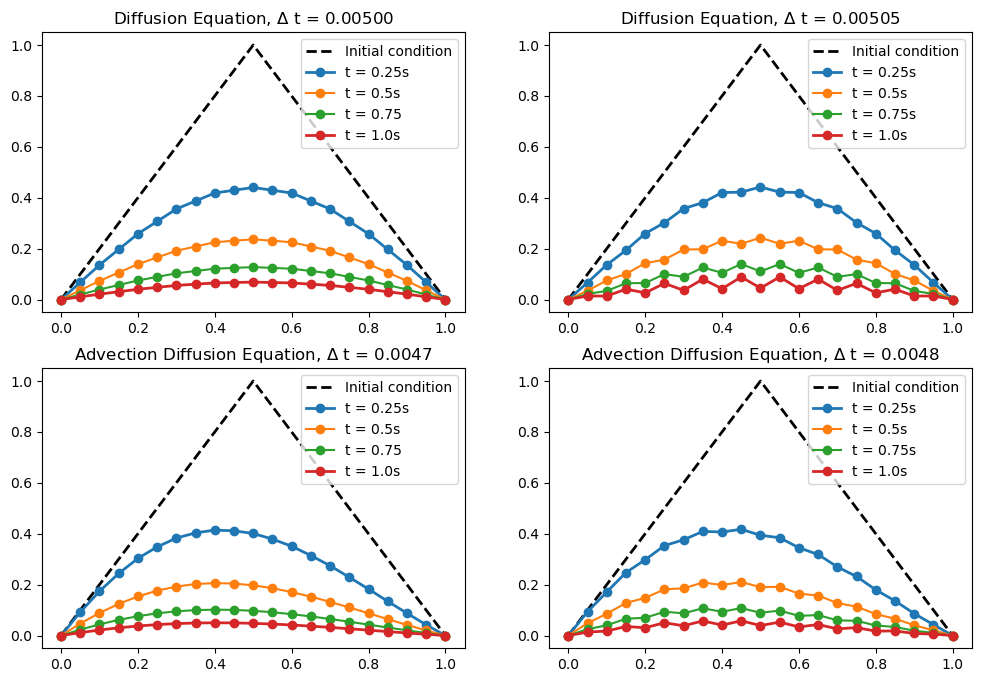

In [160]:
# Question 4 Code

import numpy as np
import matplotlib.pyplot as plt
X_POINTS = 20 + 1
dx = 1 / (X_POINTS - 1)
ALPHA = 0
EPSILON = 1
TFINAL = 1

dt = (dx**2)/(2*EPSILON)
X_MESH = np.linspace(0, 1, X_POINTS)
dx = 2 / (X_POINTS - 1)
 
x1 = np.linspace(0,1,int((X_POINTS+1)/2)) 
x2 = np.linspace(1,0,int((X_POINTS+1)/2))
x2 = x2[1:]

x3 = np.concatenate((x1, x2))

def initial_condition(x):
    return x3
u0 = initial_condition(X_MESH)

def FiniteDifference(u0, TFINAL, X_POINTS, ALPHA, EPSILON, dx, dt):
    u = u0.copy()
    t = 0.0
    u_new = np.zeros((X_POINTS))
 
 
    while t < TFINAL:     # Time stepping in increments of dt, ending at t = tinal t 
 
 
        for i in range(1, X_POINTS-1):
            # Discretized formula with first-order and second-order differences
            u_new[i] = u[i] + dt * (
                ALPHA * ((u[i+1] - u[i]) / dx) + EPSILON * ((u[i+1] - 2*u[i] + u[i-1]) / dx**2)
            )
       
        u_new[0] = 0
        u_new[-1] = 0
 
        u = u_new.copy()
        t += dt
    u[0] = 0
    u[-1] = 0
    return u

# Run the finite difference scheme
u_final = FiniteDifference(u0, TFINAL, X_POINTS, 0, 1, dx, 0.005)
u_0_75 = FiniteDifference(u0, 0.75, X_POINTS, 0, 1, dx, 0.005)
u_0_5 = FiniteDifference(u0, 0.5, X_POINTS, 0, 1, dx, 0.005)
u_0_25 = FiniteDifference(u0, 0.25, X_POINTS, 0, 1,dx, 0.005)

u_final_2 = FiniteDifference(u0, TFINAL, X_POINTS, 0, 1, dx, 0.00505)
u_0_75_2 = FiniteDifference(u0, 0.75, X_POINTS, 0, 1, dx, 0.00505)
u_0_5_2 = FiniteDifference(u0, 0.5, X_POINTS, 0, 1, dx, 0.00505)
u_0_25_2 = FiniteDifference(u0, 0.25, X_POINTS, 0, 1,dx, 0.00505)

u_final_3 = FiniteDifference(u0, TFINAL, X_POINTS, 1, 1, dx, 0.0047)
u_0_75_3 = FiniteDifference(u0, 0.75, X_POINTS, 1, 1, dx, 0.0047)
u_0_5_3 = FiniteDifference(u0, 0.5, X_POINTS, 1, 1, dx, 0.0047)
u_0_25_3 = FiniteDifference(u0, 0.25, X_POINTS, 1, 1,dx, 0.0047)

u_final_4 = FiniteDifference(u0, TFINAL, X_POINTS, 1, 1, dx, 0.0048)
u_0_75_4 = FiniteDifference(u0, 0.75, X_POINTS, 1, 1, dx, 0.0048)
u_0_5_4 = FiniteDifference(u0, 0.5, X_POINTS, 1, 1, dx, 0.0048)
u_0_25_4 = FiniteDifference(u0, 0.25, X_POINTS, 1, 1, dx, 0.0048)


fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 


# Plot the diffusion equation with increments of dt = 0.25 
axs[0,0].plot(X_MESH, u0, label="Initial condition", color='black', linestyle='--', lw=2)
axs[0,0].plot(X_MESH, u_0_25, '-o', label="t = 0.25s", lw=2)
axs[0,0].plot(X_MESH, u_0_5, '-o', label='t = 0.5s')
axs[0,0].plot(X_MESH, u_0_75, '-o', label='t = 0.75')
axs[0,0].plot(X_MESH, u_final,'-o' , label="t = 1.0s", lw=2)
axs[0,0].set_title(r'Diffusion Equation, $\Delta$ t = 0.00500')
axs[0,0].legend()

# Unstable diffusion equation, same initial conditions
axs[0,1].plot(X_MESH, u0, label="Initial condition", color='black', linestyle='--', lw=2)
axs[0,1].plot(X_MESH, u_0_25_2, '-o', label="t = 0.25s", lw=2)
axs[0,1].plot(X_MESH, u_0_5_2, '-o', label='t = 0.5s')
axs[0,1].plot(X_MESH, u_0_75_2, '-o', label='t = 0.75s')
axs[0,1].plot(X_MESH, u_final_2,'-o' , label="t = 1.0s", lw=2)
axs[0,1].set_title(r'Diffusion Equation, $\Delta$ t = 0.00505')
axs[0,1].legend()

# Plot the diffusion equation with increments of dt = 0.25 
axs[1,0].plot(X_MESH, u0, label="Initial condition", color='black', linestyle='--', lw=2)
axs[1,0].plot(X_MESH, u_0_25_3, '-o', label="t = 0.25s", lw=2)
axs[1,0].plot(X_MESH, u_0_5_3, '-o', label='t = 0.5s')
axs[1,0].plot(X_MESH, u_0_75_3, '-o', label='t = 0.75')
axs[1,0].plot(X_MESH, u_final_3,'-o' , label="t = 1.0s", lw=2)
axs[1,0].set_title(r'Advection Diffusion Equation, $\Delta$ t = 0.0047')
axs[1,0].legend()

# Unstable diffusion equation, same initial conditions
axs[1,1].plot(X_MESH, u0, label="Initial condition", color='black', linestyle='--', lw=2)
axs[1,1].plot(X_MESH, u_0_25_4, '-o', label="t = 0.25s", lw=2)
axs[1,1].plot(X_MESH, u_0_5_4, '-o', label='t = 0.5s')
axs[1,1].plot(X_MESH, u_0_75_4, '-o', label='t = 0.75s')
axs[1,1].plot(X_MESH, u_final_4,'-o' , label="t = 1.0s", lw=2)
axs[1,1].set_title(r'Advection Diffusion Equation, $\Delta$ t = 0.0048')
axs[1,1].legend()
plt.show()

# Question 5

**Implement the $\theta$-scheme using the linear algebra routines in Python to solve the matrix system, for varying spacial resolutions.**

---
In order to determine the three unknowns, a tridiagonal matrix algorithm can be used. A system of n unknowns can be written as:

$$
a_{i} x_{i-1} + b_{i} x_{i} + c_{i} x_{i+1} = d_{i} \tag{8-a}
$$
For this system, the tridiagonal matrix is in the following form
$$
\begin{bmatrix}
b_{1}  & c_{1} &        &        & 0      \\
a_{2}  & b_{2} & c_{2}  &        &        \\
       & a_{3} & b_{3}  & \ddots &        \\
       &       & \ddots & \ddots & c_{n_1}\\
0      &       &        & a_{n}  & b_n    \\
\end{bmatrix}

\begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
\vdots\\
x_{n} \\
\end{bmatrix}
=
\begin{bmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\vdots\\
d_{n}\\
\end{bmatrix}
\tag{8-b}
$$

For the advection-diffusion system, equation $(7)$ with the three unknowns on the LHS can be written in the form of $(8-a)$, and subsequently the tridiagonal matrix system $(8-b)$ as shown above. By letting $(a_{i}, b_{i}, c_{i})$ be equal to the coefficients of $(u_{i-1}^{n+1}, u_{i}^{n+1}, u_{i+1}^{n+1})$ from equation $(7)$, a tridiagonal matrix can be assembled.

The matrix system therefore is given in the form Ax = b, where A is an (n-2)*(n-2) matrix and b is a (n-2) vector:
$$

\begin{bmatrix}
1 + C\theta + 2D\theta  & -C\theta - D\theta     &                         &          & 0                      \\
-D\theta                & 1 + C\theta + 2D\theta & -C\theta - D\theta      &          &                        \\
                        & -D\theta               & 1 + C\theta + 2D\theta  & \ddots   &                        \\
                        &                        & \ddots                  & \ddots   & -C\theta - D\theta     \\
0                       &                        &                         & -D\theta & 1 + C\theta + 2D\theta \\
\end{bmatrix}

\begin{bmatrix}
u_{1}^{n+1} \\
u_{2}^{n+1} \\
u_{3}^{n+1} \\
\vdots\\
u_{j-1}^{n+1} \\
\end{bmatrix}
=
\begin{bmatrix}
u_{1}^{n} + C(1-\theta)(u_{2}^{n} - u_{1}^{n}) + D(1-\theta)(u_{2}^{n} - 2u_{1}^{n} + u_{0}^{n}) \\
u_{2}^{n} + C(1-\theta)(u_{3}^{n} - u_{2}^{n}) + D(1-\theta)(u_{3}^{n} - 2u_{2}^{n} + u_{1}^{n}) \\
u_{3}^{n} + C(1-\theta)(u_{4}^{n} - u_{3}^{n}) + D(1-\theta)(u_{4}^{n} - 2u_{3}^{n} + u_{2}^{n}) \\
\vdots\\
u_{j-1}^{n} + C(1-\theta)(u_{j}^{n} - u_{j-1}^{n}) + D(1-\theta)(u_{j}^{n} - 2u_{j-1}^{n} + u_{j-2}^{n})\\
\end{bmatrix}

\tag{9}

$$
The x matrix will be solved for using a linear algebra solver, and then the b matrix will be reconstructed with the solution to the x matrix to compute the next time step. 

---
**Fourier Analysis Section**

**Advection term**


The time step is chosen based on the Courant-Friedrichs-Lewy (CFL) conditions. This determines the maximum time step required for the scheme to be stable. These are determined with fourier analysis. For the advection term, $u_{j}^{n+1}$ is given as:

$$
u_{j}^{n+1} = u_{j}^{n} + C(\theta (u_{j+1}^{n+1} - u_{j}^{n+1}) + (1-\theta (u_{j+1}^{n} - u_{j}^n)))   \tag{10-a}
$$

Where $C = \frac{\alpha \Delta t}{\Delta x}$ is the constant defined above. The round off error can be defined as $\epsilon _{j}^{n} = N_{j}^{n} - u_{j}^{n}$, where N is the numerical solution in finite precision. This can be substituded into (10-a) as follows:

$$
\epsilon _{j}^{n+1} = \epsilon _{j}^{n} + C(\theta (\epsilon _{j+1}^{n+1} - \epsilon {j}^{n+1}) + (1-\theta) (\epsilon _{j+1}^{n} - \epsilon _{j}^n)) \tag{10-b}
$$
For non periodic boundary conditions, the fourier integral is given by:

$$
\epsilon (x,t) = \int _{\frac{-\pi}{\Delta x}}^{\frac{\pi}{\Delta x}}E_k (t)e^{ikx}dk  \tag{10-c}
$$

This can be substituted into (10-b) as $\epsilon _k(x,t) = E_k (t)e^{ikx}$ and gives the following:

$$
E_m(t+\Delta t)e^{ik_m x} = E_m(t)e^{ik_m (x)} + C(\theta(E_m(t+\Delta t)e^{ik_m (x+\Delta x)} - E_m(t+\Delta t)e^{ik_m x}) + (1-\theta)(E_m(t)e^{ik_m (x+\Delta x)} - E_m(t)e^{ik_m x})) \tag{10-d}
$$
Both sides of the equation can be dividied by $e^{ik_m x}$:

$$
E_m(t+\Delta t) = E_m(t) + C(\theta(E_m(t + \Delta t)e^{ik_m \Delta x} - E_m(t+\Delta t)) + (1-\theta)(E_m(t)e^{ik_m \Delta x} - E_m(t))) \tag{10-e} 
$$

This can then be arranged, bringing all of the $E_m(t + \Delta t)$ terms to the LHS, and rearranging to factor the $E_m(t), E_m(t + \Delta t)$ out.

$$
E_m(t+\Delta t)(1-C \theta(e^{ik_m \Delta x} - 1)) = E_m(t)(1+C(1-\theta)(e^{ik_m \Delta x} -1)) \tag{10-f}
$$

Rearranging gives:

$$
\frac{E_m(t+\Delta t)}{E_m(t)} = \frac{(1+C(1-\theta)(e^{ik_m \Delta x} -1))}{(1-C \theta(e^{ik_m \Delta x} - 1))} \tag{10-g}
$$
The amplication factor $G$ can be defined as (10-h) below, and is a necessary condition for $|G| \le 1$

$$
G \equiv \frac{E_m(t+\Delta t)}{E_m(t)} \implies|G| \le 1 \tag{10-h}
$$

The euler identity can be used for when $k_m \Delta x = \pi$, as this is our worst case example that would cause instability, simplifying the equation to the following:

$$
G = \frac{1- 2C(1-\theta)}{1+2C \theta}
$$
There are 2 cases to consider, those being:
$$
\frac{1- 2C(1-\theta)}{1+2C \theta} \le 1 \text{  and  } \frac{1- 2C(1-\theta)}{1+2C \theta} \ge -1   \tag{10-i}
$$

For case 1:

$$
1-2C(1-\theta) \le 1+2C \theta
$$

$$
-C (1-\theta) \le C\theta
$$

$$
0 \le C
$$

For case 2:

$$
1 - 2C(1-\theta) \ge -1 -2C \theta
$$

$$
2 \ge 2C(1-\theta)
$$

$$
C \le 1
$$

Therefore, the stability condition for this is given by $ 0 \le C \le 1$. This can be rearranged, and for the advection term, the timestep can be determined by rearranging this, ensuring that $C$ lies in the bounds specified:
$$
\frac{\alpha \Delta t}{\Delta x} \le C \implies \Delta t \le \frac{C \Delta x}{\alpha} \tag{10-j}
$$

**Diffusion term**

The same method can be applied to the diffusion term of (1-a).

$$
u_j^{n+1} = u_j^n + D (\theta (u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1}) + (1-\theta)(u_{j+1}^{n} - 2u_{j}^{n} + u_{j-1}^{n})) \tag{11-a}
$$

Where D = $\frac{\epsilon \Delta t}{\Delta x^2}$. Following the same process as before gives:

$$
\epsilon _{j}^{n+1} = \epsilon _{j}^{n} + D (\theta (\epsilon _{j+1}^{n+1} - 2\epsilon _{j}^{n+1} + \epsilon _{j-1}^{n+1}) + (1-\theta)(\epsilon _{j+1}^{n} - 2\epsilon _{j}^{n} + \epsilon _{j-1}^{n})) \tag{11-b}
$$

$$
E_m(t+\Delta t)e^{ik_m x} = E_m(t)e^{ik_m x} + D(\theta (E_m(t+\Delta t)e^{ik_m (x+ \Delta x)} - 2E_m(t+\Delta t)e^{ik_m x} + E_m(t+\Delta t)e^{ik_m (x-\Delta x)}) \dots $$
$$
\dots + (1-\theta)(E_m(t)e^{ik_m (x+\Delta x)} - 2E_m(t)e^{ik_m x} + E_m(t)e^{ik_m (x-\Delta x)})) \tag{11-c}
$$

Dividing by $e^{ik_m x}$ gives:

$$
E_m(t+ \Delta t) = E_m(t) + D(\theta E_m(t+\Delta t)(e^{ik_m \Delta x} - 2+ e^{-ik_m \Delta x})  + (1-\theta)E_m(t)(e^{ik_m \Delta x} - 2+ e^{-ik_m \Delta x})) \tag{11-d}
$$

$$
\frac{E_m(t+\Delta t)}{E_m(t)} = G = \frac{1 + D(1-\theta)(e^{ik_m \Delta x} + e^{-ik_m \Delta x} - 2)}{1 - D\theta ((e^{ik_m \Delta x} + e^{-ik_m \Delta x} - 2))} \tag{11-e}
$$

Applying the euler identity for $e^{ikx} + e^{-ikx} \equiv 2cos(kx)$, cases can be made for when $ k\Delta x = \pi , so cos(k\Delta x) = -1$. Once again, there are two cases, those being:
$$
\frac{1-4D(1-\theta)}{1+4D\theta} \le 1 \text{  and  } \frac{1-4D(1-\theta)}{1+4D\theta} \ge -1  \tag{11-f}
$$
For the first case, multiply by $1 + 4D\theta$:
$$
1 - 4D(1-\theta) \le 1 + 4D\theta
$$
This reduces to:
$$
0 \le D
$$
Meaning D must be positive. Rearranging case 2 gives:
$$
1 - 4D(1-\theta) \ge -1 - 4D\theta
$$
$$
2 - 4D + 4D\theta + 4D\theta \ge 0
$$
$$
-4D + 8D\theta \ge -2
$$
Divide by -4:
$$
D(1 - 2\theta) \le 1
$$
$$
D \le \frac{1}{1 - 2\theta}
$$
This is the standard CFL condition for the theta method diffusion term for a given theta. If you were to rearrange this, and substite back $\Delta x, \Delta t, \epsilon$ into this you would get:

$$
\frac{\epsilon \Delta t}{{\Delta x}^2} \le \frac{1}{2} \implies \Delta t \le \frac{{\Delta x}^2}{2\epsilon} 
$$
In order for the scheme to remain stable at all times, whichever of these two methods for determining $\Delta t$ is smaller will be the $\Delta t$ value that is chosen in the code implementation.

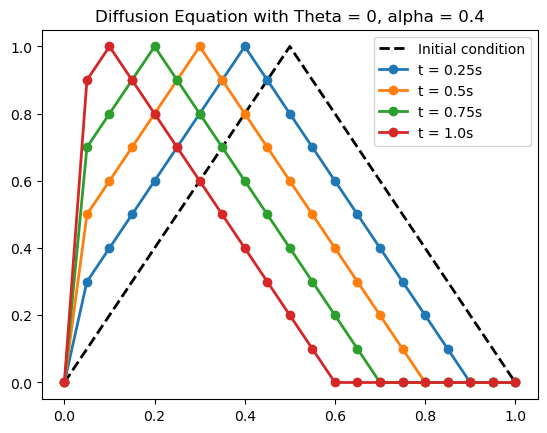

In [161]:
# Implementing the theta scheme for the Advection Diffusion equation for an arbitrary initial condition:

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

X_POINTS = 20 + 1
dx = 1 / (X_POINTS - 1)
ALPHA = 0.4
EPSILON = 0
TFINAL = 1
X_MESH = np.linspace(0, 1, X_POINTS)
def timestep(dx, EPSILON, ALPHA):
    advective_timestep = dx/ALPHA
    #diffusive_timestep = (dx**2)/(2*EPSILON)

   # if advective_timestep > diffusive_timestep:
     #   dt = diffusive_timestep
    #else:
    #    dt = advective_timestep
    dt = advective_timestep
    return dt

dt = timestep(dx, EPSILON, ALPHA)

x1 = np.linspace(0,1,int((X_POINTS+1)/2)) 
x2 = np.linspace(1,0,int((X_POINTS+1)/2))
x2 = x2[1:]

x3 = np.concatenate((x1, x2))

def initial_condition(x):
    return x3
u0 = initial_condition(X_MESH)

C = (dt * ALPHA)/(dx)
D = (EPSILON*dt)/(dx**2)

THETA = 0


def theta_method(u0, TFINAL, C, D, THETA):

    a_coefficient = (-D*THETA)
    b_coefficient = (1 + C*THETA + 2*D*THETA)
    c_coefficient = (-C*THETA - D*THETA)

    array = np.ones((X_POINTS))
    array_minus_1 = np.ones((X_POINTS-1))
    diagonal_elements = [array_minus_1*a_coefficient, array*b_coefficient, array_minus_1*c_coefficient]
    offsets = [-1, 0, 1]

    A_MATRIX = diags(diagonal_elements, offsets)
    A_MATRIX = csr_matrix(A_MATRIX)

    B_MATRIX = np.ones(X_POINTS)
    u = u0.copy()
    t = 0.0
    u_new = np.zeros((X_POINTS))
    while t < TFINAL:

        for j in range(1, (X_POINTS-1)):
            B_MATRIX[j] = u[j] + C*(1-THETA)*(u[j+1] - u[j]) + D*(1-THETA)*(u[j+1] - 2*u[j] + u[j-1])
        
        B_MATRIX[0] = 0
        B_MATRIX[-1] = 0
        u_new = spsolve(A_MATRIX, B_MATRIX)
        u = u_new.copy()

        t += dt
    
    u[0] = 0
    u[-1] = 0
    return u




sol_1 = theta_method(u0, 1, C, D, THETA)
sol_0_75 = theta_method(u0, 0.75, C, D, THETA)
sol_0_5 = theta_method(u0, 0.5, C, D, THETA)
sol_0_25 = theta_method(u0, 0.25, C, D, THETA)
plt.plot(X_MESH, u0, '--', color='black', lw=2, label='Initial condition')
plt.plot(X_MESH, sol_0_25, '-o', lw=2, label='t = 0.25s')
plt.plot(X_MESH, sol_0_5, '-o', lw=2, label='t = 0.5s')
plt.plot(X_MESH, sol_0_75, '-o', lw=2, label='t = 0.75s')
plt.plot(X_MESH, sol_1, '-o', lw=2, label='t = 1.0s')
plt.title('Diffusion Equation with Theta = ' +str(THETA) + ', alpha = ' +str(ALPHA))
plt.legend()

The figure above shows a purely advective case with $\epsilon = 0$, and it can be observed that the solution remains numerically stable as the magnitude of the solutions at different time points remains constant. This is because the CFL condition $\frac{\alpha \Delta t}{\Delta x} = 1$ is enforced.

# Question 6
**First explore the case $a(t) = 1$ with $$ u(x,0) = (1-x)^4(1+x) \text{ and then } u(x,0) = (1-x)^4(1+x)(\sum _{k=0}^{3}b_k \phi _k(x) + C) $$ for $L_p = -1, L = 1, \epsilon = 10^{-3}, T = 1 \text{ with } t \in [0, T]$, Legendre polynomials $\phi _k (x) = 1, x, 3/2 x^2 - 1/2, 5/2 x^3 - 3/2 x$ and random coefficients $b_k \in [0,1]$ (uniform distribution and for $k = (0,...3)$.**

**A constant $C \le 0$ is determined (numerically) such that $\sum _{k=0}^{3} b_{k}\phi _{k} (x) + C \le 0$. Verify that for the appropriate $\theta$ the same numerical results are obtained as for the implementation of an explicit scheme. Display some time profiles at set times rather than set iterations for a few values of $\theta, \mu$. Use a while-time-loop with discrete time, not one using iterations. Clearly define how the stability/instability and the (violation of the) maximum principle are (numerically) deterimined and displayed in a $\mu - \theta$ parameter plot. Find at least three $\mu, \theta$ - values illustrating the three possible cases $\theta = 0, 1/2, 1$. Interpret and discuss your findings. In the end, choose $\theta = 1$, where $CFL = 1$ works, and argue why this choice seems necessary (Choi et al., 2024).**

---

The constant $C$ is determined numerically. First, the legendre polynomials are calculated along the spacial domain, then each are multiplied by a random value between 0 and 1. These are then summed together, and the resulting output is an array with a value at each point along the spacial domain. The minimum value of this array is determined, and the absolute value of this is taken as the constant $C$. 

Text(0.5, 0.92, 'k0: 0.49460, k1: 0.22808, k2: 0.25547, k3: 0.39633')

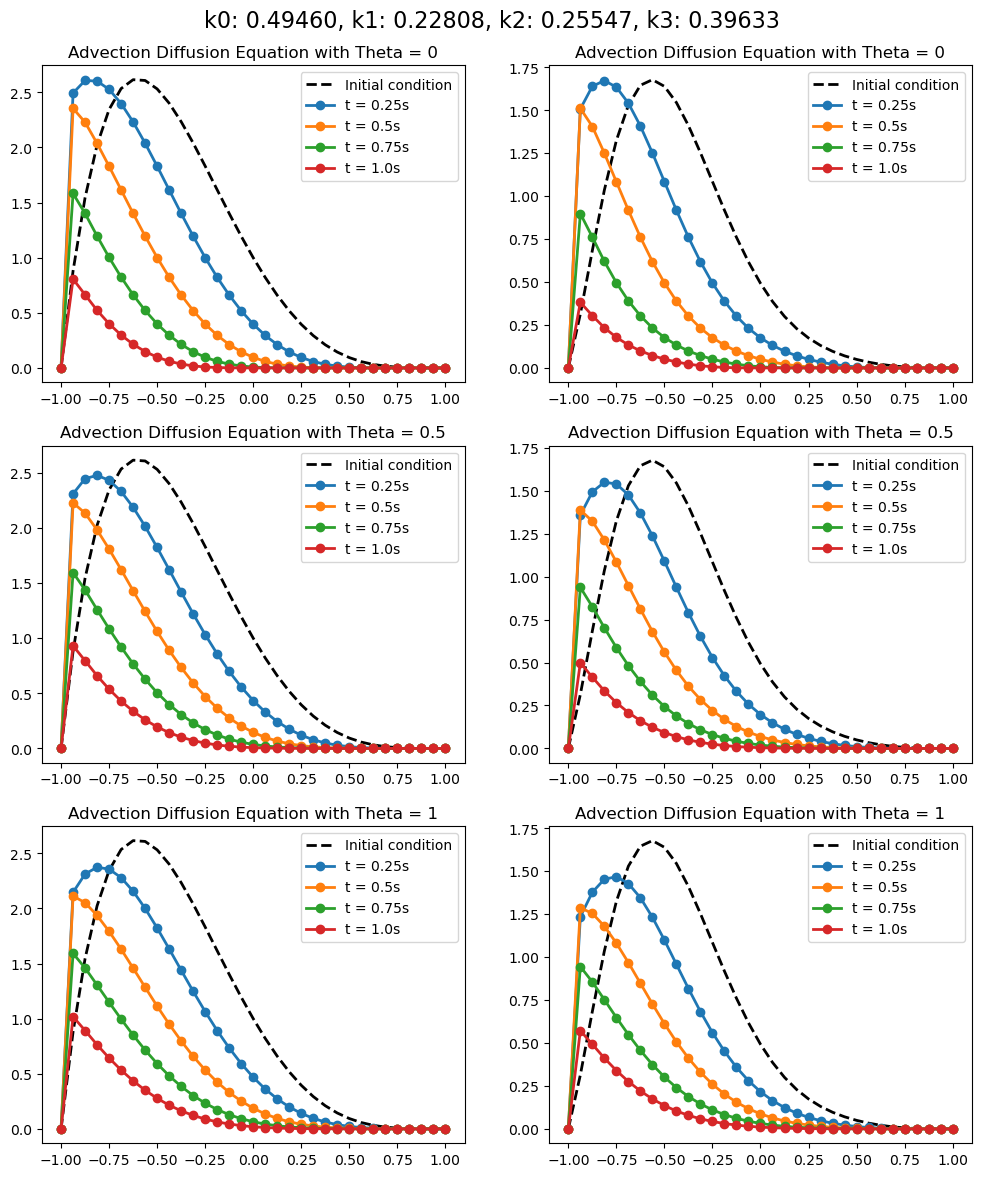

In [162]:
# Implementing the theta scheme for the Advection Diffusion equation for an arbitrary initial condition:

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

np.random.seed(50)
X_POINTS = 32 + 1
dx = 2 / (X_POINTS - 1)
ALPHA = 1
EPSILON = 0.001
TFINAL = 1
X_MESH = np.linspace(-1, 1, X_POINTS) # [-1, 1]

def timestep(dx, EPSILON, ALPHA):
    advective_timestep = dx/ALPHA
    diffusive_timestep = (dx**2)/(2*EPSILON)

    if advective_timestep > diffusive_timestep:
        dt = diffusive_timestep
    else:
        dt = advective_timestep
    return dt

dt = timestep(dx, EPSILON, ALPHA)

def initial_condition(x):   # First Initial Condition
    return (1-x)**4 * (1+x)
u0 = initial_condition(X_MESH)

k = np.random.rand(4)
def initial_condition_2(x):
    legrende1= 1
    legrende2 = x
    legrende3 = (3/2)*x**2 - (1/2)
    legrende4 = (5/2)*x**3 - (3/2)*x
    legrende = np.array([legrende1, legrende2, legrende3, legrende4], dtype=np.ndarray)
    val = sum(k*legrende)
    CONSTANT = min(val)

    return (1-x)**4 * (1+x) * (sum(k*legrende) + abs(CONSTANT))

u1 = initial_condition_2(X_MESH)

C = (dt * ALPHA)/(dx)
D = (EPSILON*dt)/(dx**2)


def theta_method(u0, TFINAL, C, D, THETA):   # Theta method implementation

    a_coefficient = (-D*THETA)
    b_coefficient = (1 + C*THETA + 2*D*THETA)
    c_coefficient = (-C*THETA - D*THETA)

    array = np.ones((X_POINTS))
    array_minus_1 = np.ones((X_POINTS-1))
    diagonal_elements = [array_minus_1*a_coefficient, array*b_coefficient, array_minus_1*c_coefficient]
    offsets = [-1, 0, 1]

    A_MATRIX = diags(diagonal_elements, offsets)
    A_MATRIX = csr_matrix(A_MATRIX)
    B_MATRIX = np.ones(X_POINTS)
    
    u = u0.copy()
    t = 0.0
    u_new = np.zeros((X_POINTS))
    while t < TFINAL:

        for j in range(1, (X_POINTS-1)):
            B_MATRIX[j] = u[j] + C*(1-THETA)*(u[j+1] - u[j]) + D*(1-THETA)*(u[j+1] - 2*u[j] + u[j-1])
        
        B_MATRIX[0] = 0
        B_MATRIX[-1] = 0
        u_new = spsolve(A_MATRIX, B_MATRIX)
        
        u = u_new.copy()

        t += dt
    
    u[0] = 0
    u[-1] = 0
    return u





sol_1_initial_0 = theta_method(u0, 1, C, D, 0)
sol_0_75_initial_0 = theta_method(u0, 0.75, C, D, 0)
sol_0_5_initial_0 = theta_method(u0, 0.5, C, D, 0)
sol_0_25_initial_0 = theta_method(u0, 0.25, C, D, 0)

sol_1_initial_1 = theta_method(u0, 1, C, D, 0.5)
sol_0_75_initial_1 = theta_method(u0, 0.75, C, D, 0.5)
sol_0_5_initial_1 = theta_method(u0, 0.5, C, D, 0.5)
sol_0_25_initial_1 = theta_method(u0, 0.25, C, D, 0.5)

sol_1_initial_2 = theta_method(u0, 1, C, D, 1)
sol_0_75_initial_2 = theta_method(u0, 0.75, C, D, 1)
sol_0_5_initial_2 = theta_method(u0, 0.5, C, D, 1)
sol_0_25_initial_2 = theta_method(u0, 0.25, C, D, 1)



sol_1_initial_00 = theta_method(u1, 1, C, D, 0)
sol_0_75_initial_00 = theta_method(u1, 0.75, C, D, 0)
sol_0_5_initial_00 = theta_method(u1, 0.5, C, D, 0)
sol_0_25_initial_00 = theta_method(u1, 0.25, C, D, 0)

sol_1_initial_11 = theta_method(u1, 1, C, D, 0.5)
sol_0_75_initial_11 = theta_method(u1, 0.75, C, D, 0.5)
sol_0_5_initial_11 = theta_method(u1, 0.5, C, D, 0.5)
sol_0_25_initial_11 = theta_method(u1, 0.25, C, D, 0.5)

sol_1_initial_22 = theta_method(u1, 1, C, D, 1)
sol_0_75_initial_22 = theta_method(u1, 0.75, C, D, 1)
sol_0_5_initial_22 = theta_method(u1, 0.5, C, D, 1)
sol_0_25_initial_22 = theta_method(u1, 0.25, C, D, 1)


fig, axs = plt.subplots(3,2, figsize=(12, 14)) 

# Plotting
# U0
axs[0,0].plot(X_MESH, u0, '--', color='black', lw=2, label='Initial condition')
axs[0,0].plot(X_MESH, sol_0_25_initial_0, '-o', lw=2, label='t = 0.25s')
axs[0,0].plot(X_MESH, sol_0_5_initial_0, '-o', lw=2, label='t = 0.5s')
axs[0,0].plot(X_MESH, sol_0_75_initial_0, '-o', lw=2, label='t = 0.75s')
axs[0,0].plot(X_MESH, sol_1_initial_0, '-o', lw=2, label='t = 1.0s')
axs[0,0].set_title('Advection Diffusion Equation with Theta = 0')
axs[0,0].legend()

axs[1,0].plot(X_MESH, u0, '--', color='black', lw=2, label='Initial condition')
axs[1,0].plot(X_MESH, sol_0_25_initial_1, '-o', lw=2, label='t = 0.25s')
axs[1,0].plot(X_MESH, sol_0_5_initial_1, '-o', lw=2, label='t = 0.5s')
axs[1,0].plot(X_MESH, sol_0_75_initial_1, '-o', lw=2, label='t = 0.75s')
axs[1,0].plot(X_MESH, sol_1_initial_1, '-o', lw=2, label='t = 1.0s')
axs[1,0].set_title('Advection Diffusion Equation with Theta = 0.5')
axs[1,0].legend()

axs[2,0].plot(X_MESH, u0, '--', color='black', lw=2, label='Initial condition')
axs[2,0].plot(X_MESH, sol_0_25_initial_2, '-o', lw=2, label='t = 0.25s')
axs[2,0].plot(X_MESH, sol_0_5_initial_2, '-o', lw=2, label='t = 0.5s')
axs[2,0].plot(X_MESH, sol_0_75_initial_2, '-o', lw=2, label='t = 0.75s')
axs[2,0].plot(X_MESH, sol_1_initial_2, '-o', lw=2, label='t = 1.0s')
axs[2,0].set_title('Advection Diffusion Equation with Theta = 1')
axs[2,0].legend()

# U1

axs[0,1].plot(X_MESH, u1, '--', color='black', lw=2, label='Initial condition')
axs[0,1].plot(X_MESH, sol_0_25_initial_00, '-o', lw=2, label='t = 0.25s')
axs[0,1].plot(X_MESH, sol_0_5_initial_00, '-o', lw=2, label='t = 0.5s')
axs[0,1].plot(X_MESH, sol_0_75_initial_00, '-o', lw=2, label='t = 0.75s')
axs[0,1].plot(X_MESH, sol_1_initial_00, '-o', lw=2, label='t = 1.0s')
axs[0,1].set_title('Advection Diffusion Equation with Theta = 0')
axs[0,1].legend()

axs[1,1].plot(X_MESH, u1, '--', color='black', lw=2, label='Initial condition')
axs[1,1].plot(X_MESH, sol_0_25_initial_11, '-o', lw=2, label='t = 0.25s')
axs[1,1].plot(X_MESH, sol_0_5_initial_11, '-o', lw=2, label='t = 0.5s')
axs[1,1].plot(X_MESH, sol_0_75_initial_11, '-o', lw=2, label='t = 0.75s')
axs[1,1].plot(X_MESH, sol_1_initial_11, '-o', lw=2, label='t = 1.0s')
axs[1,1].set_title('Advection Diffusion Equation with Theta = 0.5')
axs[1,1].legend()

axs[2,1].plot(X_MESH, u1, '--', color='black', lw=2, label='Initial condition')
axs[2,1].plot(X_MESH, sol_0_25_initial_22, '-o', lw=2, label='t = 0.25s')
axs[2,1].plot(X_MESH, sol_0_5_initial_22, '-o', lw=2, label='t = 0.5s')
axs[2,1].plot(X_MESH, sol_0_75_initial_22, '-o', lw=2, label='t = 0.75s')
axs[2,1].plot(X_MESH, sol_1_initial_22, '-o', lw=2, label='t = 1.0s')
axs[2,1].set_title('Advection Diffusion Equation with Theta = 1')
axs[2,1].legend()

plt.suptitle(f"k0: {k[0]:.5f}, k1: {k[1]:.5f}, k2: {k[2]:.5f}, k3: {k[3]:.5f}", fontsize=16, y=0.92)



**Question 6 continued...**

The comparison between the Theta scheme for a Theta = 0, and the explicit method is shown below. The plot on the left shows the solutions from each scheme, and the plot on the right shows the error between these two solutions.

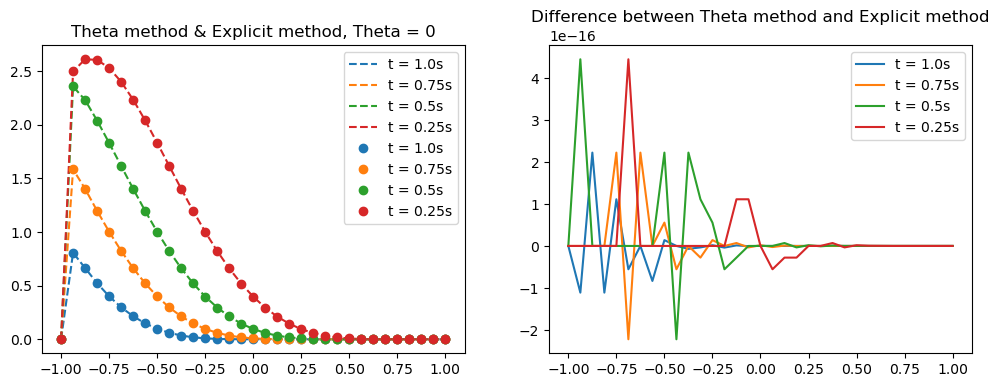

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

X_POINTS = 32 + 1
dx = 2 / (X_POINTS - 1)
ALPHA = 1
EPSILON = 0.001
TFINAL = 1
THETA = 0

X_MESH = np.linspace(-1, 1, X_POINTS)
def timestep(dx, EPSILON, ALPHA):
    advective_timestep = dx/ALPHA
    diffusive_timestep = (dx**2)/(2*EPSILON)

    if advective_timestep > diffusive_timestep:
        dt = diffusive_timestep
    else:
        dt = advective_timestep
    return dt

dt = timestep(dx, EPSILON, ALPHA)

def initial_condition(x):   # First Initial Condition
    return (1-x)**4 * (1+x)
u0 = initial_condition(X_MESH)

C = (dt * ALPHA)/(dx)
D = (EPSILON*dt)/(dx**2)

def theta_method(u0, TFINAL, C, D, THETA):   # Theta method implementation

    a_coefficient = (-D*THETA)
    b_coefficient = (1 + C*THETA + 2*D*THETA)
    c_coefficient = (-C*THETA - D*THETA)

    array = np.ones((X_POINTS))
    array_minus_1 = np.ones((X_POINTS-1))
    diagonal_elements = [array_minus_1*a_coefficient, array*b_coefficient, array_minus_1*c_coefficient]
    offsets = [-1, 0, 1]

    A_MATRIX = diags(diagonal_elements, offsets)
    A_MATRIX = csr_matrix(A_MATRIX)
    B_MATRIX = np.ones(X_POINTS)
    
    u = u0.copy()
    t = 0.0
    u_new = np.zeros((X_POINTS))
    while t < TFINAL:

        for j in range(1, (X_POINTS-1)):
            B_MATRIX[j] = u[j] + C*(1-THETA)*(u[j+1] - u[j]) + D*(1-THETA)*(u[j+1] - 2*u[j] + u[j-1])
        
        B_MATRIX[0] = 0
        B_MATRIX[-1] = 0
        u_new = spsolve(A_MATRIX, B_MATRIX)
        
        u = u_new.copy()

        t += dt
    
    u[0] = 0
    u[-1] = 0
    return u

def FiniteDifference(u0, TFINAL, X_POINTS, ALPHA, EPSILON, dx, dt):
    u = u0.copy()
    t = 0.0
    u_new = np.zeros((X_POINTS))
 
 
    while t < TFINAL:     # Time stepping in increments of dt, ending at t = tinal t 
 
 
        for i in range(1, X_POINTS-1):
            # Discretized formula with first-order and second-order differences
            u_new[i] = u[i] + dt * (
                ALPHA * ((u[i+1] - u[i]) / dx) + EPSILON * ((u[i+1] - 2*u[i] + u[i-1]) / dx**2)
            )
       
        u_new[0] = 0
        u_new[-1] = 0
 
        u = u_new.copy()
        t += dt
    u[0] = 0
    u[-1] = 0
    return u

u_FD_1 = FiniteDifference(u0, TFINAL, X_POINTS, ALPHA, EPSILON, dx, dt)
u_FD_0_75 = FiniteDifference(u0, 0.75, X_POINTS, ALPHA, EPSILON, dx, dt)
u_FD_0_5 = FiniteDifference(u0, 0.5, X_POINTS, ALPHA, EPSILON, dx, dt)
u_FD_0_25 = FiniteDifference(u0, 0.25, X_POINTS, ALPHA, EPSILON, dx, dt)

u_THETA_1 = theta_method(u0, TFINAL, C, D, THETA)
u_THETA_0_75 = theta_method(u0, 0.75, C, D, THETA)
u_THETA_0_5 = theta_method(u0, 0.5, C, D, THETA)
u_THETA_0_25 = theta_method(u0, 0.25, C, D, THETA)


error_FD_THETA1 = (u_FD_1 - u_THETA_1)
error_FD_THETA0_75 = (u_FD_0_75 - u_THETA_0_75)
error_FD_THETA0_5 = (u_FD_0_5 - u_THETA_0_5)
error_FD_THETA0_25 = (u_FD_0_25 - u_THETA_0_25)

fig, axs = plt.subplots(1,2, figsize=(12, 4)) 

axs[0].plot(X_MESH, u_FD_1, '--', color='C0', label='t = 1.0s')
axs[0].plot(X_MESH, u_FD_0_75, '--', color='C1', label='t = 0.75s')
axs[0].plot(X_MESH, u_FD_0_5, '--', color='C2', label='t = 0.5s')
axs[0].plot(X_MESH, u_FD_0_25, '--', color='C3', label='t = 0.25s')

axs[0].plot(X_MESH, u_THETA_1, 'o', label='t = 1.0s')
axs[0].plot(X_MESH, u_THETA_0_75, 'o', label='t = 0.75s')
axs[0].plot(X_MESH, u_THETA_0_5, 'o', label='t = 0.5s')
axs[0].plot(X_MESH, u_THETA_0_25,'o', label='t = 0.25s')
axs[0].set_title('Theta method & Explicit method, Theta = 0')
axs[0].legend()

axs[1].plot(X_MESH, error_FD_THETA1, label='t = 1.0s')
axs[1].plot(X_MESH, error_FD_THETA0_75, label='t = 0.75s')
axs[1].plot(X_MESH, error_FD_THETA0_5, label='t = 0.5s')
axs[1].plot(X_MESH, error_FD_THETA0_25, label='t = 0.25s')
axs[1].set_title('Difference between Theta method and Explicit method')
axs[1].legend()


It can be observed that the error is so small that it is in the range of floating point arithmetic error at $10^{-16}$, and can therefore be regarded as 0.

# Question 7

**Second, consider the case $\alpha (t) = 1$ and initial condition (see Choi et al., 2024) $$u(x,0) = (1-x)^4 (1+x)(\sum_{k=0}^{3} b_k \phi _k (x) + C) $$ for $L_p = -1, L = 1, \epsilon = 10^-3, T = 1 \text{ with } t \in [0,T]$. Display some time profiles at set times (e.g., $t = 0, 0.25, 0.5, 0.75, 1$ in one plot and also zoom in near $x = -1$) rather than set iterations for $\theta = 0.5$. Interpret and discuss your findings.**

---

To graphically determine convergence, the solution of changing time steps are computed, and determine the error between neighbouring timesteps. The Y axis will display the percentage error between the previous and next time step, and the x axis presents the scaling factor between the original number of discrete points and the current one.


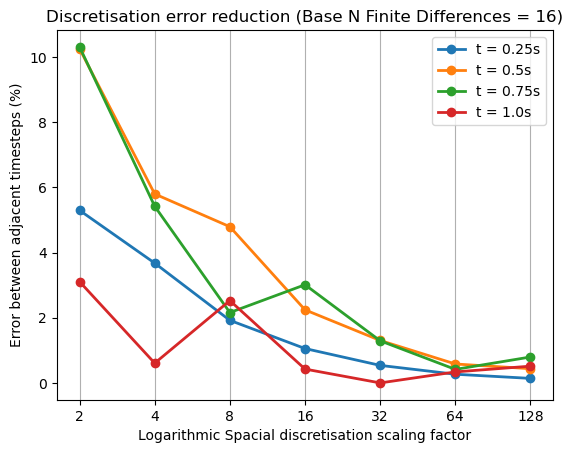

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix
from matplotlib.ticker import LogLocator, FuncFormatter

np.random.seed(123) # for reproducable results


# determining spacial discretisation for each case
X_POINTS_0 = 16+1
X_POINTS_1 = 32 + 1
X_POINTS_2 = 64 + 1
X_POINTS_3 = 128+1
X_POINTS_4 = 256+1
X_POINTS_5 = 512+1
X_POINTS_6 = 1024+1
X_POINTS_7 = 2048+1

dx_0 = 2 / (X_POINTS_0 - 1)
dx_1 = 2 / (X_POINTS_1 - 1)
dx_2 = 2/ (X_POINTS_2 - 1)
dx_3 = 2/ (X_POINTS_3 - 1)
dx_4 = 2/ (X_POINTS_4 - 1)
dx_5 = 2/ (X_POINTS_5 - 1)
dx_6 = 2/ (X_POINTS_6 - 1)
dx_7 = 2/ (X_POINTS_7 - 1)
ALPHA = 1
EPSILON = 0.001
TFINAL = 1


def timestep(dx, EPSILON, ALPHA):
    advective_timestep = dx/ALPHA
    diffusive_timestep = (dx**2)/(2*EPSILON)

    if advective_timestep > diffusive_timestep:
        dt = diffusive_timestep
    else:
        dt = advective_timestep
    return dt

dt0 = timestep(dx_0, EPSILON, ALPHA)
dt1 = timestep(dx_1, EPSILON, ALPHA)
dt2 = timestep(dx_2, EPSILON, ALPHA)
dt3 = timestep(dx_3, EPSILON, ALPHA)
dt4 = timestep(dx_4, EPSILON, ALPHA)
dt5 = timestep(dx_5, EPSILON, ALPHA)
dt6 = timestep(dx_6, EPSILON, ALPHA)
dt7 = timestep(dx_7, EPSILON, ALPHA)


X_MESH_0 = np.linspace(-1, 1, X_POINTS_0) # [-1, 1]
X_MESH_1 = np.linspace(-1, 1, X_POINTS_1) # [-1, 1]
X_MESH_2 = np.linspace(-1, 1, X_POINTS_2) # [-1, 1]
X_MESH_3 = np.linspace(-1, 1, X_POINTS_3) # [-1, 1]
X_MESH_4 = np.linspace(-1, 1, X_POINTS_4) # [-1, 1]
X_MESH_5 = np.linspace(-1, 1, X_POINTS_5) # [-1, 1]
X_MESH_6 = np.linspace(-1, 1, X_POINTS_6) # [-1, 1]
X_MESH_7 = np.linspace(-1, 1, X_POINTS_7) # [-1, 1]


k = np.random.rand(4)
def initial_condition(x):
    legrende1= 1
    legrende2 = x
    legrende3 = (3/2)*x**2 - (1/2)
    legrende4 = (5/2)*x**3 - (3/2)*x
    legrende = np.array([legrende1, legrende2, legrende3, legrende4], dtype=np.ndarray)
    val = sum(k*legrende)
    CONSTANT = min(val)

    return (1-x)**4 * (1+x) * (sum(k*legrende) + abs(CONSTANT))


u0 = initial_condition(X_MESH_0)
u1 = initial_condition(X_MESH_1)
u2 = initial_condition(X_MESH_2)
u3 = initial_condition(X_MESH_3)
u4 = initial_condition(X_MESH_4)
u5 = initial_condition(X_MESH_5)
u6 = initial_condition(X_MESH_6)
u7 = initial_condition(X_MESH_7)

C0 = (dt0 * ALPHA)/(dx_0)
C1 = (dt1 * ALPHA)/(dx_1)
C2 = (dt2 * ALPHA)/(dx_2)
C3 = (dt3 * ALPHA)/(dx_3)
C4 = (dt4 * ALPHA)/(dx_4)
C5 = (dt5 * ALPHA)/(dx_5)
C6 = (dt6 * ALPHA)/(dx_6)
C7 = (dt7 * ALPHA)/(dx_7)

D0 = (EPSILON*dt0)/(dx_0**2)
D1 = (EPSILON*dt1)/(dx_1**2)
D2 = (EPSILON*dt2)/(dx_2**2)
D3 = (EPSILON*dt3)/(dx_3**2)
D4 = (EPSILON*dt4)/(dx_4**2)
D5 = (EPSILON*dt5)/(dx_5**2)
D6 = (EPSILON*dt6)/(dx_6**2)
D7 = (EPSILON*dt7)/(dx_7**2)


def theta_method(u0, TFINAL, C, D, THETA, dt, X_POINTS):   # Theta method implementation

    a_coefficient = (-D*THETA)
    b_coefficient = (1 + C*THETA + 2*D*THETA)
    c_coefficient = (-C*THETA - D*THETA)

    array = np.ones((X_POINTS))
    array_minus_1 = np.ones((X_POINTS-1))
    diagonal_elements = [array_minus_1*a_coefficient, array*b_coefficient, array_minus_1*c_coefficient]
    offsets = [-1, 0, 1]

    A_MATRIX = diags(diagonal_elements, offsets)
    A_MATRIX = csr_matrix(A_MATRIX)
    B_MATRIX = np.ones(X_POINTS)
    
    u = u0.copy()
    t = 0.0
    u_new = np.zeros((X_POINTS))
    while t < TFINAL:

        for j in range(1, (X_POINTS-1)):
            B_MATRIX[j] = u[j] + C*(1-THETA)*(u[j+1] - u[j]) + D*(1-THETA)*(u[j+1] - 2*u[j] + u[j-1])
        
        B_MATRIX[0] = 0
        B_MATRIX[-1] = 0
        u_new = spsolve(A_MATRIX, B_MATRIX)
        
        u = u_new.copy()

        t += dt
    
    u[0] = 0
    u[-1] = 0
    return u

# Plot maximum difference between one case and the next for a constant dt and a changing dx 


sol0_0_25 = theta_method(u0, 0.25, C0, D0, 0.5, dt0, X_POINTS_0)
sol1_0_25 = theta_method(u1, 0.25, C1, D1, 0.5, dt1, X_POINTS_1)
sol2_0_25 = theta_method(u2, 0.25, C2, D2, 0.5, dt2, X_POINTS_2)
sol3_0_25 = theta_method(u3, 0.25, C3, D3, 0.5, dt3, X_POINTS_3)
sol4_0_25 = theta_method(u4, 0.25, C4, D4, 0.5, dt4, X_POINTS_4)
sol5_0_25 = theta_method(u5, 0.25, C5, D5, 0.5, dt5, X_POINTS_5)
sol6_0_25 = theta_method(u6, 0.25, C6, D6, 0.5, dt6, X_POINTS_6)
sol7_0_25 = theta_method(u7, 0.25, C7, D7, 0.5, dt7, X_POINTS_7)

sol0_0_5 = theta_method(u0, 0.5, C0, D0, 0.5, dt0, X_POINTS_0)
sol1_0_5 = theta_method(u1, 0.5, C1, D1, 0.5, dt1, X_POINTS_1)
sol2_0_5 = theta_method(u2, 0.5, C2, D2, 0.5, dt2, X_POINTS_2)
sol3_0_5 = theta_method(u3, 0.5, C3, D3, 0.5, dt3, X_POINTS_3)
sol4_0_5 = theta_method(u4, 0.5, C4, D4, 0.5, dt4, X_POINTS_4)
sol5_0_5 = theta_method(u5, 0.5, C5, D5, 0.5, dt5, X_POINTS_5)
sol6_0_5 = theta_method(u6, 0.5, C6, D6, 0.5, dt6, X_POINTS_6)
sol7_0_5 = theta_method(u7, 0.5, C7, D7, 0.5, dt7, X_POINTS_7)

sol0_0_75 = theta_method(u0, 0.75, C0, D0, 0.5, dt0, X_POINTS_0)
sol1_0_75 = theta_method(u1, 0.75, C1, D1, 0.5, dt1, X_POINTS_1)
sol2_0_75 = theta_method(u2, 0.75, C2, D2, 0.5, dt2, X_POINTS_2)
sol3_0_75 = theta_method(u3, 0.75, C3, D3, 0.5, dt3, X_POINTS_3)
sol4_0_75 = theta_method(u4, 0.75, C4, D4, 0.5, dt4, X_POINTS_4)
sol5_0_75 = theta_method(u5, 0.75, C5, D5, 0.5, dt5, X_POINTS_5)
sol6_0_75 = theta_method(u6, 0.75, C6, D6, 0.5, dt6, X_POINTS_6)
sol7_0_75 = theta_method(u7, 0.75, C7, D7, 0.5, dt7, X_POINTS_7)


sol0_1 = theta_method(u0, TFINAL, C0, D0, 0.5, dt0, X_POINTS_0)
sol1_1 = theta_method(u1, TFINAL, C1, D1, 0.5, dt1, X_POINTS_1)
sol2_1 = theta_method(u2, TFINAL, C2, D2, 0.5, dt2, X_POINTS_2)
sol3_1 = theta_method(u3, TFINAL, C3, D3, 0.5, dt3, X_POINTS_3)
sol4_1 = theta_method(u4, TFINAL, C4, D4, 0.5, dt4, X_POINTS_4)
sol5_1 = theta_method(u5, TFINAL, C5, D5, 0.5, dt5, X_POINTS_5)
sol6_1 = theta_method(u6, TFINAL, C6, D6, 0.5, dt6, X_POINTS_6)
sol7_1 = theta_method(u7, TFINAL, C7, D7, 0.5, dt7, X_POINTS_7)


error0_0_25 = abs(max(sol0_0_25 / max(sol1_0_25)))
error1_0_25 = abs(max(sol1_0_25) / max(sol2_0_25))
error2_0_25 = abs(max(sol2_0_25)/max(sol3_0_25))
error3_0_25 = abs(max(sol3_0_25)/max(sol4_0_25))
error4_0_25 = abs(max(sol4_0_25)/max(sol5_0_25))
error5_0_25 = abs(max(sol5_0_25/max(sol6_0_25)))
error6_0_25 = abs(max(sol6_0_25/max(sol7_0_25)))

error0_0_5 = abs(max(sol0_0_5 / max(sol1_0_5)))
error1_0_5 = abs(max(sol1_0_5) / max(sol2_0_5))
error2_0_5 = abs(max(sol2_0_5)/max(sol3_0_5))
error3_0_5 = abs(max(sol3_0_5)/max(sol4_0_5))
error4_0_5 = abs(max(sol4_0_5)/max(sol5_0_5))
error5_0_5 = abs(max(sol5_0_5/max(sol6_0_5)))
error6_0_5 = abs(max(sol6_0_5/max(sol7_0_5)))

error0_0_75 = abs(max(sol0_0_75 / max(sol1_0_75)))
error1_0_75 = abs(max(sol1_0_75) / max(sol2_0_75))
error2_0_75 = abs(max(sol2_0_75)/max(sol3_0_75))
error3_0_75 = abs(max(sol3_0_75)/max(sol4_0_75))
error4_0_75 = abs(max(sol4_0_75)/max(sol5_0_75))
error5_0_75 = abs(max(sol5_0_75/max(sol6_0_75)))
error6_0_75 = abs(max(sol6_0_75/max(sol7_0_75)))

error0_1 = abs(max(sol0_1 / max(sol1_1)))
error1_1 = abs(max(sol1_1) / max(sol2_1))
error2_1 = abs(max(sol2_1)/max(sol3_1))
error3_1 = abs(max(sol3_1)/max(sol4_1))
error4_1 = abs(max(sol4_1)/max(sol5_1))
error5_1 = abs(max(sol5_1/max(sol6_1)))
error6_1 = abs(max(sol6_1/max(sol7_1)))

error_0_25 = abs(1 - np.array([error0_0_25, error1_0_25, error2_0_25, error3_0_25, error4_0_25, error5_0_25, error6_0_25]))
error_0_5 = abs(1 - np.array([error0_0_5, error1_0_5, error2_0_5, error3_0_5, error4_0_5, error5_0_5, error6_0_5]))
error_0_75 = abs(1 - np.array([error0_0_75, error1_0_75, error2_0_75, error3_0_75, error4_0_75, error5_0_75, error6_0_75]))
error_1 = abs(1 - np.array([error0_1, error1_1, error2_1, error3_1, error4_1, error5_1, error6_1]))

x_error = [2, 4, 8, 16, 32, 64, 128]
plt.plot(x_error, error_0_25*100,'o-', lw=2, label='t = 0.25s')
plt.plot(x_error, error_0_5*100,'o-', lw=2, label='t = 0.5s')
plt.plot(x_error, error_0_75*100,'o-', lw=2, label='t = 0.75s')
plt.plot(x_error, error_1*100,'o-', lw=2, label='t = 1.0s')
plt.xscale('log', base=2)
locator = LogLocator(base=2, numticks=10)
plt.gca().xaxis.set_major_locator(locator)
def log_format_func(x, pos):
    return f'{int(x):d}'  # Format the tick as an integer without scientific notation

formatter = FuncFormatter(log_format_func)  # Apply the custom formatter
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True, which='both', axis='x')
plt.ylabel('Error between adjacent timesteps (%)')
plt.xlabel('Logarithmic Spacial discretisation scaling factor')
plt.title('Discretisation error reduction (Base N Finite Differences = 16)')
plt.legend()
plt.show()


# Computes in roughly 10 seconds

**Question 7 continued...**

The error has been computed in the figure above, and the convergence to zero as the spacial discretisation is increased. 

Now, the solution for different values of $\Delta x$ will be plotted at a single timestep at $t = 1.0$ and zoomed in for the area close to $x = -1$. This shows that as the number of spacial points is increased, the solution both diffuses faster and advects further to the left, but also the slope of the curve close to the boundary can better be represented due to the number of points used.

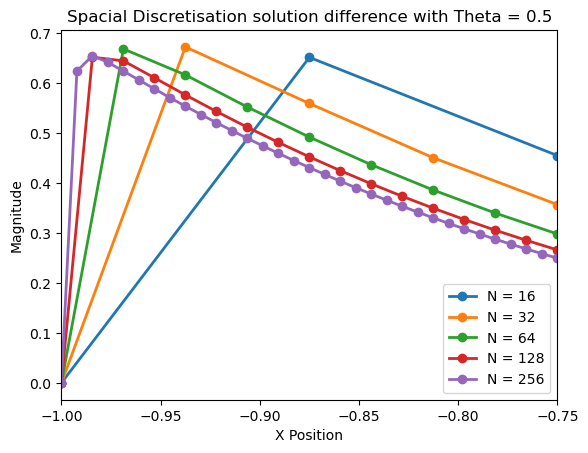

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix
from matplotlib.ticker import LogLocator, FuncFormatter

np.random.seed(123) # for reproducable results


# determining spacial discretisation for each case
X_POINTS_0 = 16+1
X_POINTS_1 = 32+1
X_POINTS_2 = 64+1
X_POINTS_3 = 128+1
X_POINTS_4 = 256+1
X_POINTS_5 = 512+1
X_POINTS_6 = 1024+1

dx_0 = 2 / (X_POINTS_0 - 1)
dx_1 = 2 / (X_POINTS_1 - 1)
dx_2 = 2/ (X_POINTS_2 - 1)
dx_3 = 2/ (X_POINTS_3 - 1)
dx_4 = 2/ (X_POINTS_4 - 1)
dx_5 = 2/ (X_POINTS_5 - 1)
dx_6 = 2/ (X_POINTS_6 - 1)
ALPHA = 1
EPSILON = 0.001
TFINAL = 1

def timestep(dx, EPSILON, ALPHA):
    advective_timestep = dx/ALPHA
    diffusive_timestep = (dx**2)/(2*EPSILON)

    if advective_timestep > diffusive_timestep:
        dt = diffusive_timestep
    else:
        dt = advective_timestep
    return dt

dt0 = timestep(dx_0, EPSILON, ALPHA)
dt1 = timestep(dx_1, EPSILON, ALPHA)
dt2 = timestep(dx_2, EPSILON, ALPHA)
dt3 = timestep(dx_3, EPSILON, ALPHA)
dt4 = timestep(dx_4, EPSILON, ALPHA)
dt5 = timestep(dx_5, EPSILON, ALPHA)
dt6 = timestep(dx_6, EPSILON, ALPHA)


X_MESH_0 = np.linspace(-1, 1, X_POINTS_0) # [-1, 1]
X_MESH_1 = np.linspace(-1, 1, X_POINTS_1) # [-1, 1]
X_MESH_2 = np.linspace(-1, 1, X_POINTS_2) # [-1, 1]
X_MESH_3 = np.linspace(-1, 1, X_POINTS_3) # [-1, 1]
X_MESH_4 = np.linspace(-1, 1, X_POINTS_4) # [-1, 1]
X_MESH_5 = np.linspace(-1, 1, X_POINTS_5) # [-1, 1]
X_MESH_6 = np.linspace(-1, 1, X_POINTS_6) # [-1, 1]


k = np.random.rand(4)
def initial_condition(x):
    legrende1= 1
    legrende2 = x
    legrende3 = (3/2)*x**2 - (1/2)
    legrende4 = (5/2)*x**3 - (3/2)*x
    legrende = np.array([legrende1, legrende2, legrende3, legrende4], dtype=np.ndarray)
    val = sum(k*legrende)
    CONSTANT = min(val)

    return (1-x)**4 * (1+x) * (sum(k*legrende) + abs(CONSTANT))


u0 = initial_condition(X_MESH_0)
u1 = initial_condition(X_MESH_1)
u2 = initial_condition(X_MESH_2)
u3 = initial_condition(X_MESH_3)
u4 = initial_condition(X_MESH_4)
u5 = initial_condition(X_MESH_5)
u6 = initial_condition(X_MESH_6)


C0 = (dt0 * ALPHA)/(dx_0)
C1 = (dt1 * ALPHA)/(dx_1)
C2 = (dt2 * ALPHA)/(dx_2)
C3 = (dt3 * ALPHA)/(dx_3)
C4 = (dt4 * ALPHA)/(dx_4)
C5 = (dt5 * ALPHA)/(dx_5)
C6 = (dt6 * ALPHA)/(dx_6)

D0 = (EPSILON*dt0)/(dx_0**2)
D1 = (EPSILON*dt1)/(dx_1**2)
D2 = (EPSILON*dt2)/(dx_2**2)
D3 = (EPSILON*dt3)/(dx_3**2)
D4 = (EPSILON*dt4)/(dx_4**2)
D5 = (EPSILON*dt5)/(dx_5**2)
D6 = (EPSILON*dt6)/(dx_6**2)


def theta_method(u0, TFINAL, C, D, THETA, dt, X_POINTS):   # Theta method implementation

    a_coefficient = (-D*THETA)
    b_coefficient = (1 + C*THETA + 2*D*THETA)
    c_coefficient = (-C*THETA - D*THETA)

    array = np.ones((X_POINTS))
    array_minus_1 = np.ones((X_POINTS-1))
    diagonal_elements = [array_minus_1*a_coefficient, array*b_coefficient, array_minus_1*c_coefficient]
    offsets = [-1, 0, 1]

    A_MATRIX = diags(diagonal_elements, offsets)
    A_MATRIX = csr_matrix(A_MATRIX)
    B_MATRIX = np.ones(X_POINTS)
    
    u = u0.copy()
    t = 0.0
    u_new = np.zeros((X_POINTS))
    while t < TFINAL:

        for j in range(1, (X_POINTS-1)):
            B_MATRIX[j] = u[j] + C*(1-THETA)*(u[j+1] - u[j]) + D*(1-THETA)*(u[j+1] - 2*u[j] + u[j-1])
        
        B_MATRIX[0] = 0
        B_MATRIX[-1] = 0
        u_new = spsolve(A_MATRIX, B_MATRIX)
        
        u = u_new.copy()

        t += dt
    
    u[0] = 0
    u[-1] = 0
    return u

# Plot maximum difference between one case and the next for a constant dt and a changing dx 

sol0_1 = theta_method(u0, TFINAL, C0, D0, 0.5, dt0, X_POINTS_0)
sol1_1 = theta_method(u1, TFINAL, C1, D1, 0.5, dt1, X_POINTS_1)
sol2_1 = theta_method(u2, TFINAL, C2, D2, 0.5, dt2, X_POINTS_2)
sol3_1 = theta_method(u3, TFINAL, C3, D3, 0.5, dt3, X_POINTS_3)
sol4_1 = theta_method(u4, TFINAL, C4, D4, 0.5, dt4, X_POINTS_4)
#sol5_1 = theta_method(u5, TFINAL, C5, D5, 0.5, dt5, X_POINTS_5)
#sol6_1 = theta_method(u6, TFINAL, C6, D6, 0.5, dt6, X_POINTS_6)

#plt.plot(X_MESH_6, sol6_1, 'o-', lw=1, label='N = 1024')
#plt.plot(X_MESH_5, sol5_1, 'o-', lw=1, label='N = 512')
plt.plot(X_MESH_0, sol0_1, 'o-', lw=2, label='N = 16')
plt.plot(X_MESH_1, sol1_1, 'o-', lw=2, label='N = 32')
plt.plot(X_MESH_2, sol2_1, 'o-', lw=2, label='N = 64')
plt.plot(X_MESH_3, sol3_1, 'o-', lw=2, label='N = 128')
plt.plot(X_MESH_4, sol4_1, 'o-', lw=2, label='N = 256')


plt.xlabel('X Position')
plt.ylabel('Magnitude')
plt.legend()
plt.xlim(-1,-0.75)
plt.title('Spacial Discretisation solution difference with Theta = 0.5')
plt.show()

# Question 8
**Third, explore the previous case for smaller values of $\epsilon = 10^{-4}, 10^{-5}, 10^{-6}$. Report, interpret and discuss your findings.**


Text(0.5, 1.0, 'Diffusion coefficient error comparison, t = 1.0')

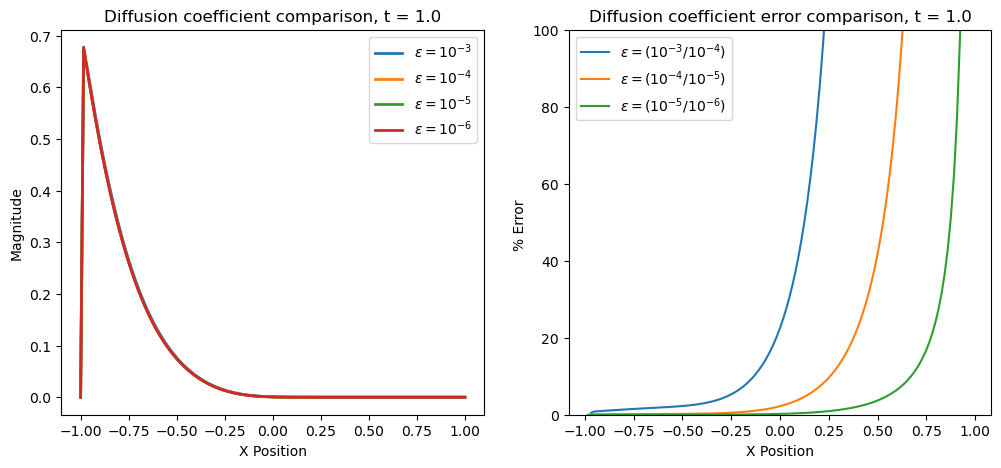

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

np.random.seed(123)
X_POINTS = 128 + 1
dx = 2 / (X_POINTS - 1)
ALPHA = 1
EPSILON = 0.001
TFINAL = 1.0
X_MESH = np.linspace(-1, 1, X_POINTS) # [-1, 1]


k = np.random.rand(4)
def initial_condition(x):
    legrende1= 1
    legrende2 = x
    legrende3 = (3/2)*x**2 - (1/2)
    legrende4 = (5/2)*x**3 - (3/2)*x
    legrende = np.array([legrende1, legrende2, legrende3, legrende4], dtype=np.ndarray)
    val = sum(k*legrende)
    CONSTANT = min(val)

    return (1-x)**4 * (1+x) * (sum(k*legrende) + abs(CONSTANT))

u0 = initial_condition(X_MESH)
def timestep(dx, EPSILON, ALPHA):
    advective_timestep = dx/ALPHA
    diffusive_timestep = (dx**2)/(2*EPSILON)

    if advective_timestep > diffusive_timestep:
        dt = diffusive_timestep
    else:
        dt = advective_timestep
    return dt

def theta_method(u0, TFINAL, EPSILON, THETA):   # Theta method implementation

    
    dt = timestep(dx, EPSILON, ALPHA)
    C = (dt * ALPHA)/(dx)
    D = (EPSILON*dt)/(dx**2)
    a_coefficient = (-D*THETA)
    b_coefficient = (1 + C*THETA + 2*D*THETA)
    c_coefficient = (-C*THETA - D*THETA)

    array = np.ones((X_POINTS))
    array_minus_1 = np.ones((X_POINTS-1))
    diagonal_elements = [array_minus_1*a_coefficient, array*b_coefficient, array_minus_1*c_coefficient]
    offsets = [-1, 0, 1]

    A_MATRIX = diags(diagonal_elements, offsets)
    A_MATRIX = csr_matrix(A_MATRIX)
    B_MATRIX = np.ones(X_POINTS)
    
    u = u0.copy()
    t = 0.0
    u_new = np.zeros((X_POINTS))
    while t < TFINAL:

        for j in range(1, (X_POINTS-1)):
            B_MATRIX[j] = u[j] + C*(1-THETA)*(u[j+1] - u[j]) + D*(1-THETA)*(u[j+1] - 2*u[j] + u[j-1])
        
        B_MATRIX[0] = 0
        B_MATRIX[-1] = 0
        u_new = spsolve(A_MATRIX, B_MATRIX)
        
        u = u_new.copy()

        t += dt
    
    u[0] = 0
    u[-1] = 0
    return u

sol_3 = theta_method(u0, TFINAL, 0.001, 0.5)
sol_4 = theta_method(u0, TFINAL, 0.0001, 0.5)
sol_5 = theta_method(u0, TFINAL, 0.00001, 0.5)
sol_6 = theta_method(u0, TFINAL, 0.000001, 0.5)


error34 = (sol_3[1:-1])/(sol_4[1:-1])
error45 = sol_4[1:-1]/sol_5[1:-1]
error56 = sol_5[1:-1]/sol_6[1:-1]
XMESH_ERROR = X_MESH[1:-1]

fig, axs = plt.subplots(1,2, figsize=(12, 5))
axs[0].plot(X_MESH, sol_3, lw=2, label={r"$\epsilon = 10^{-3}$"})
axs[0].plot(X_MESH, sol_4, lw=2, label={r"$\epsilon = 10^{-4}$"})
axs[0].plot(X_MESH, sol_5, lw=2, label={r"$\epsilon = 10^{-5}$"})
axs[0].plot(X_MESH, sol_6, lw=2, label={r"$\epsilon = 10^{-6}$"})
axs[0].set_title(r"Diffusion coefficient comparison, t = " + str(TFINAL))
axs[0].set_xlabel('X Position')
axs[0].set_ylabel('Magnitude')
axs[0].legend()

axs[1].plot(XMESH_ERROR, (error34 - 1)*100, label={r"$\epsilon = (10^{-3} / 10^{-4})$"})
axs[1].plot(XMESH_ERROR, (error45 - 1)*100, label={r"$\epsilon = (10^{-4} / 10^{-5})$"})
axs[1].plot(XMESH_ERROR, (error56 - 1)*100, label={r"$\epsilon = (10^{-5} / 10^{-6})$"})
axs[1].set_ylim(0,100)
axs[1].set_xlabel('X Position')
axs[1].set_ylabel('% Error ')
axs[1].legend()
axs[1].set_title("Diffusion coefficient error comparison, t = " + str(TFINAL))


It can be observed in the left hand plot that epsilon is so small that the difference in diffusion is so small, that it is practically negligible after only 1 second. The right hand plot displays the error ($\epsilon = 10^{-3} / \epsilon = 10^{-4}$, etc and 0 normalised) between each epsilon value. The error increases on the right hand side as the differences in magnitudes for the floating point numbers becomes dramatically, these numbers are all $\approx 0$, therefore the error between them is effectively 0. To investigate any meaningful differece between these diffusion coefficients, a longer time scale would need to be employed, and advection would have to be dramatically reduced or set to 0 in order for the plot to stay within the required bounds.